<a href="https://colab.research.google.com/github/meefs/art/blob/master/Torchdreams_playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Install  torch-dreams**

instructions from Nerdy Rodent - https://www.youtube.com/watch?v=gXfu2jUvHmQ

pip install

In [1]:
!pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio==0.8.1 -f https://download.pytorch.org/whl/torch_stable.html
!pip install torch-dreams imageio imageio-ffmpeg matplotlib

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |█████████████▌                  | 834.1 MB 1.3 MB/s eta 0:14:34tcmalloc: large alloc 1147494400 bytes == 0x55ac37206000 @  0x7f6d0bd69615 0x55abfead44cc 0x55abfebb447a 0x55abfead72ed 0x55abfebc8e1d 0x55abfeb4ae99 0x55abfeb459ee 0x55abfead8bda 0x55abfeb4ad00 0x55abfeb459ee 0x55abfead8bda 0x55abfeb47737 0x55abfebc9c66 0x55abfeb46daf 0x55abfebc9c66 0x55abfeb46daf 0x55abfebc9c66 0x55abfeb46daf 0x55abfead9039 0x55abfeb1c409 0x55abfead7c52 0x55abfeb4ac25 0x55abfeb459ee 0x55abfead8bda 0x55abfeb47737 0x55abfeb459ee 0x55abfead8bda 0x55abfeb46915 0x55abfead8afa 0x55abfeb46c0d 0x55abfeb459ee
     |█████████████████               | 1055.7 MB 2.2 MB/s eta 0:06:58tcmalloc: large alloc 1434370048 bytes == 0x55ac7b85c000 @  0x7f6d0bd69615 0x55abfead44cc 0x55abfebb447a 0x55abfead72ed 0x55abfebc8e1d 0x55abfeb4ae99 0x55abfeb459ee 0x55abfead8bda 0x55abfeb4ad00 0x55abfeb459ee 0x55abfead8bda 0x55abfeb47737 0x55abfebc9c66 0x55abfeb46d

Create a directory to save scripts & images

In [3]:
!mkdir torch-dreams ## create /content/torch-dreams

!cd torch-dreams

Some examples...
 

In [ ]:
import matplotlib.pyplot as plt
import torchvision.models as models
from torch_dreams.dreamer import dreamer

model = models.inception_v3(pretrained=True)
dreamy_boi = dreamer(model, device = 'cuda')

# Print the model
print(model)

image_param = dreamy_boi.render(
    layers = [model.Mixed_5c],
)

plt.imshow(image_param)
plt.show()


Not so minimal example...


In [ ]:
model = models.inception_v3(pretrained=True)
dreamy_boi = dreamer(model, device = 'cuda', quiet = False)

image_param = dreamy_boi.render(
    layers = [model.Mixed_5b],
    width = 256,
    height = 256,
    iters = 150,
    lr = 9e-3,
    rotate_degrees = 15,
    scale_max = 1.2,
    scale_min =  0.5,
    translate_x = 0.2,
    translate_y = 0.2,
    custom_func = None,
    weight_decay = 1e-2,
    grad_clip = 1.,
)

plt.imshow(image_param)
plt.show()


Visualizing individual channels

100%|██████████| 120/120 [00:03<00:00, 34.41it/s]


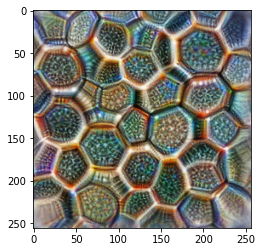

In [9]:
model = models.inception_v3(pretrained=True)
dreamy_boi = dreamer(model, device = 'cuda')

layers_to_use = [model.Mixed_6b.branch1x1.conv]

def make_custom_func(layer_number = 0, channel_number= 0): 
    def custom_func(layer_outputs):
        loss = layer_outputs[layer_number][channel_number].mean()
        return -loss
    return custom_func

my_custom_func = make_custom_func(layer_number= 0, channel_number = 119)

image_param = dreamy_boi.render(
    layers = layers_to_use,
    custom_func = my_custom_func,
)
plt.imshow(image_param)
plt.show()
